In [6]:
# Import our dependencies


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


#  Import and read the WELFake_Dataset.csv.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
news_df = pd.read_csv("WELFake_Dataset.csv")
news_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
# finding Datatypes
news_df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [8]:
# Statistic for text column
text_length = news_df.text.str.split().str.len()
text_length.describe()

count    72095.000000
mean       540.843346
std        625.442464
min          0.000000
25%        227.000000
50%        399.000000
75%        667.000000
max      24234.000000
Name: text, dtype: float64

In [9]:
# Statisci for title columns
title_length = news_df.title.str.split().str.len()
title_length.describe()

count    71576.000000
mean        12.268218
std          4.133661
min          1.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         72.000000
Name: title, dtype: float64

In [10]:
# Drop Unnecessary Columns
news_df=news_df.drop("Unnamed: 0", axis=1)
news_df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
# Count label values
news_df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

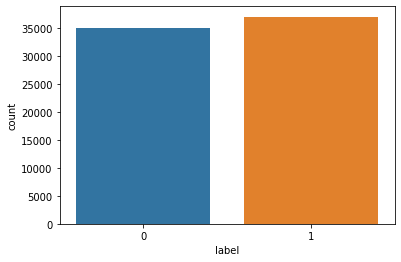

In [12]:
# Counting with plot both labels
sns.countplot(x="label", data=news_df)

In [13]:
#news_df[['title', 'text']].isnull()="None"
news_df["title"].fillna("None", inplace = True)
news_df["text"].fillna("None", inplace = True)

In [14]:
news_df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [15]:
news_df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,None,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [16]:
news_df.to_csv("fakenews_data.csv", index=False)


In [17]:
df=pd.read_csv("fakenews_data.csv")
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,None,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [18]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /Users/ssayhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ssayhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [20]:
df['title'] = df['title'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
df['title'] = df['title'].str.replace('[^a-zA-Z]', ' ')
df['text'] = df['text'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ')

/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_10962/4289419464.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_10962/4289419464.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('[^a-zA-Z]', ' ')
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_10962/4289419464.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_10962/4289419464.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'

In [21]:
#for columns in df.columns:
    #df[columns]=df[columns].str.lower()
df['title']=df['title'].str.lower()
df['text']=df['text'].str.lower()

In [22]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,none,did they post their votes for hillary already,1
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
4,satan russia unvelis an image of its terrify...,the rs sarmat missile dubbed satan will re...,1


In [23]:
set_words= stopwords.words('english')

In [24]:
df['title']=df['title'].apply(lambda x:' '.join([word for word in x.split() if word not in (set_words)]))
df['text']=df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (set_words)]))

In [25]:
df.head()

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
1,none,post votes hillary already,1
2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying new supe...,rs sarmat missile dubbed satan replace ss flie...,1


In [26]:
df.head(50)

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
1,none,post votes hillary already,1
2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying new supe...,rs sarmat missile dubbed satan replace ss flie...,1
5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1
6,dr ben carson targeted irs never audit spoke n...,dr ben carson tells story happened spoke obama,1
7,house intel chair trumprussia fake story evide...,,1
8,sports bar owner bans nfl gameswill show true ...,owner ringling bar located south white sulphur...,1
9,latest pipeline leak underscores dangers dakot...,file sept file photo marker welcomes commuters...,1


In [27]:
df["title"].str.split(expand=True).stack().value_counts()[:10]

trump      15929
new         9167
video       8970
york        6601
times       6578
us          6370
says        4088
hillary     3467
clinton     3257
obama       3124
dtype: int64

In [28]:
df["text"].str.split(expand=True).stack().value_counts()[:10]

said         231467
trump        180595
would        105153
us           101436
people        88150
one           84709
president     82887
mr            72050
new           70372
also          64966
dtype: int64

In [29]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

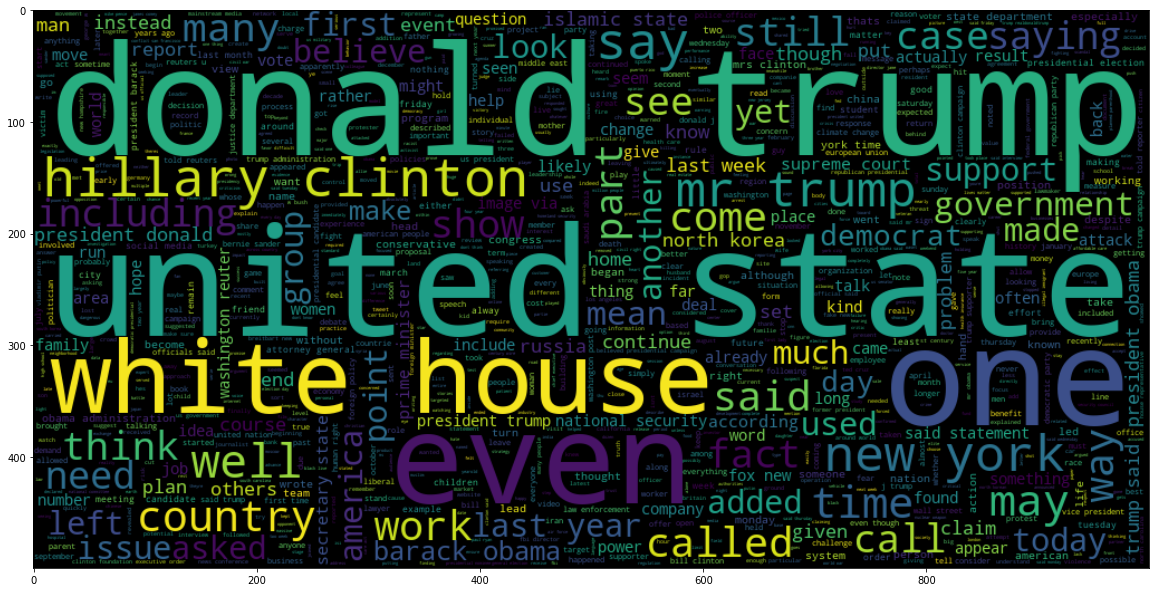

In [55]:
wc=WordCloud(max_words=1000, background_color='black', width=1000, height =500)
word_cloud=wc.generate(' '.join(df['text']))
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation = 'bilinear')
plt.show

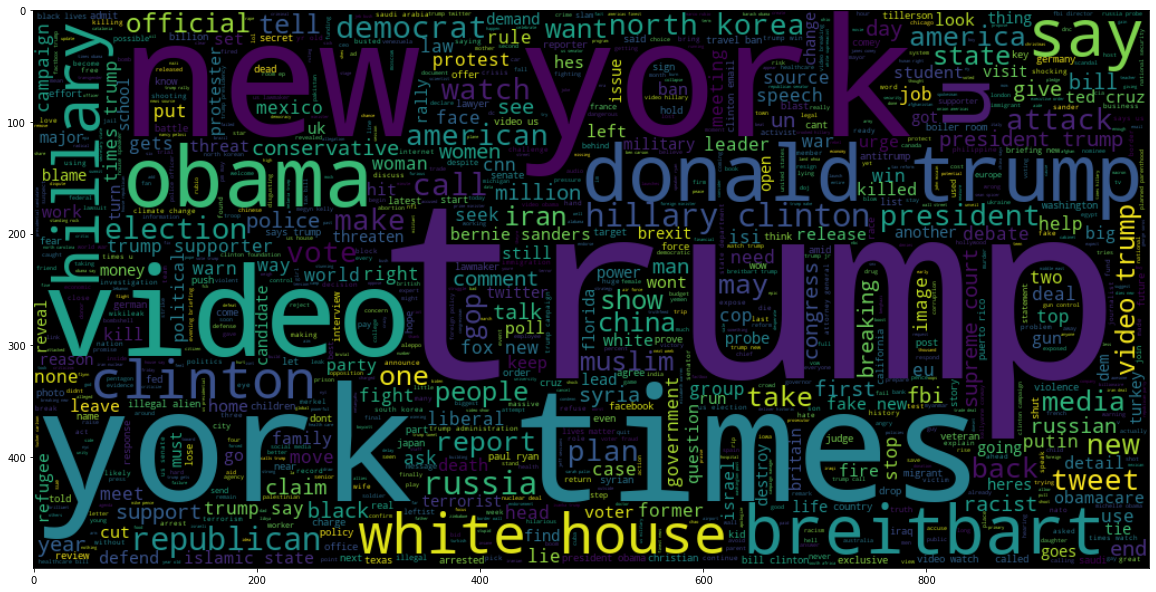

In [59]:
word_cloud_title=wc.generate(" ".join(df['title']))
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [30]:
df.to_csv("clean_fakenews.csv", index=False)

In [31]:
df_clean=pd.read_csv("clean_fakenews.csv")
df_clean.head()

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
1,none,post votes hillary already,1
2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying new supe...,rs sarmat missile dubbed satan replace ss flie...,1


In [32]:
# # Splitting Data
# X=df['title']
# y=df['label']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(
# X_train, y_train, test_size=0.25, random_state=1)

In [33]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['title'], df['label'], 
                                                                    random_state=1, 
                                                                    test_size=0.3)

In [34]:

#val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                #random_state=1, 
                                                                #test_size=0.5, 
                                                                #stratify=temp_labels)

Text(0, 0.5, 'Number of texts')

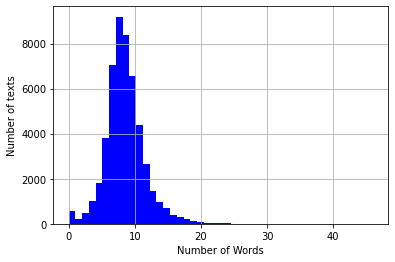

In [60]:
text_length = [len(i.split()) for i in train_text]

pd.Series(text_length).hist(bins = 45, color='blue')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')